# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Load the Data

In [132]:
df=pd.read_csv('/content/Traffic_Accidents (1).csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [134]:
df.shape

(52000, 30)

In [135]:
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [136]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Location_Easting_OSGR'}>,
        <Axes: title={'center': 'Location_Northing_OSGR'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Police_Force'}>,
        <Axes: title={'center': 'Accident_Severity'}>,
        <Axes: title={'center': 'Number_of_Vehicles'}>],
       [<Axes: title={'center': 'Number_of_Casualties'}>,
        <Axes: title={'center': 'Day_of_Week'}>,
        <Axes: title={'center': 'Local_Authority_(District)'}>,
        <Axes: title={'center': '1st_Road_Class'}>],
       [<Axes: title={'center': '1st_Road_Number'}>,
        <Axes: title={'center': 'Speed_limit'}>,
        <Axes: title={'center': '2nd_Road_Class'}>,
        <Axes: title={'center': '2nd_Road_Number'}>],
       [<Axes: title={'center': 'Urban_or_Rural_Area'}>,
        <Axes: title={'center': 'Year'}>, <Axes: >, <Axes: >]],
      dtype=object)

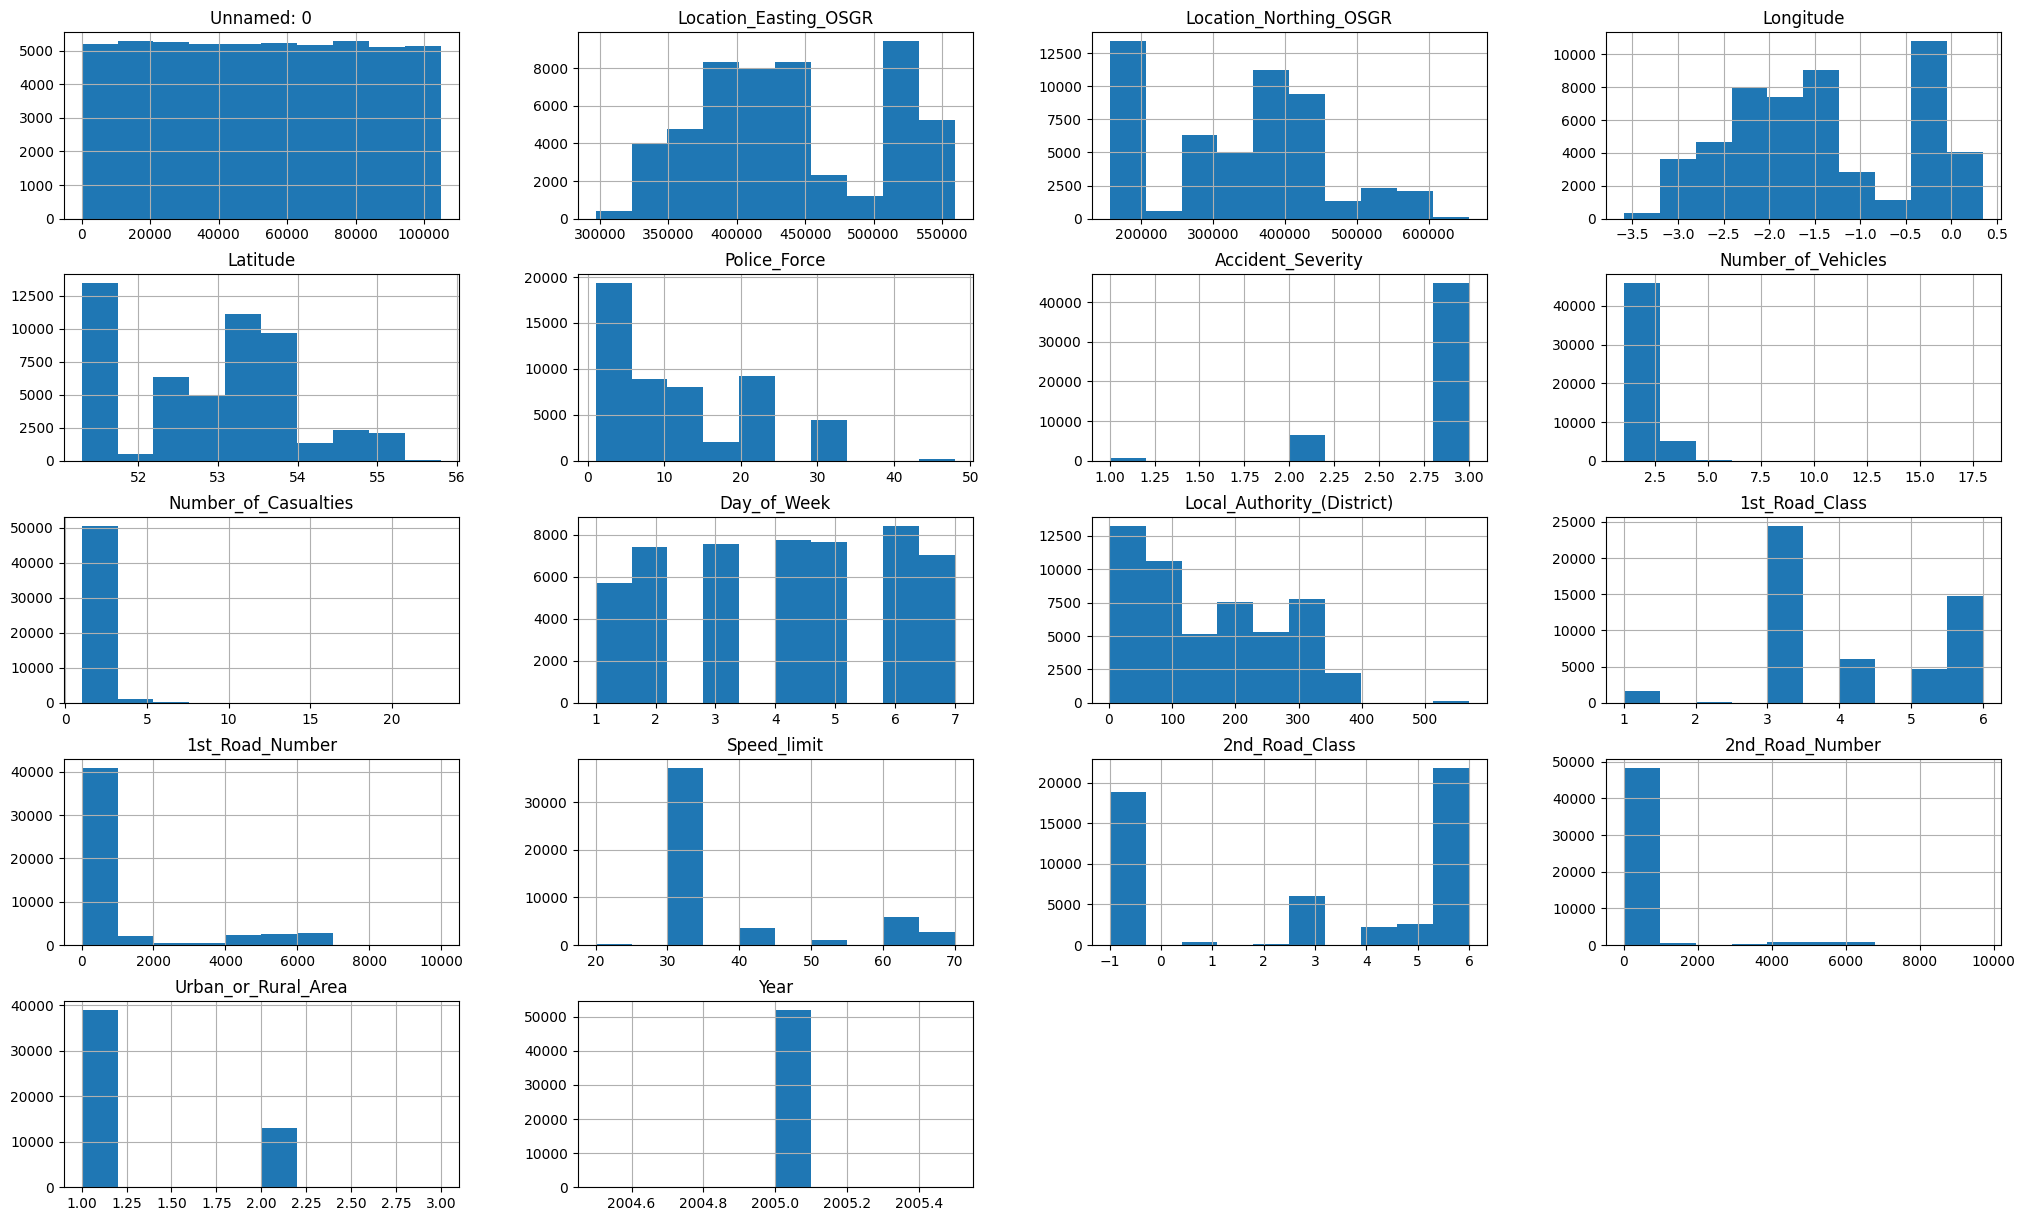

In [137]:
df.hist(figsize=(25,15))

In [138]:
df.Accident_Index.value_counts()

,count
Accident_Index,
2.01E+12,13022
200520G026802,1
200506P025749,1
200532C000405,1
200501TX20059,1
...,...
20053102A1000,1
200501QK50403,1
200501QA10185,1


In [139]:
df.isna().sum()


,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


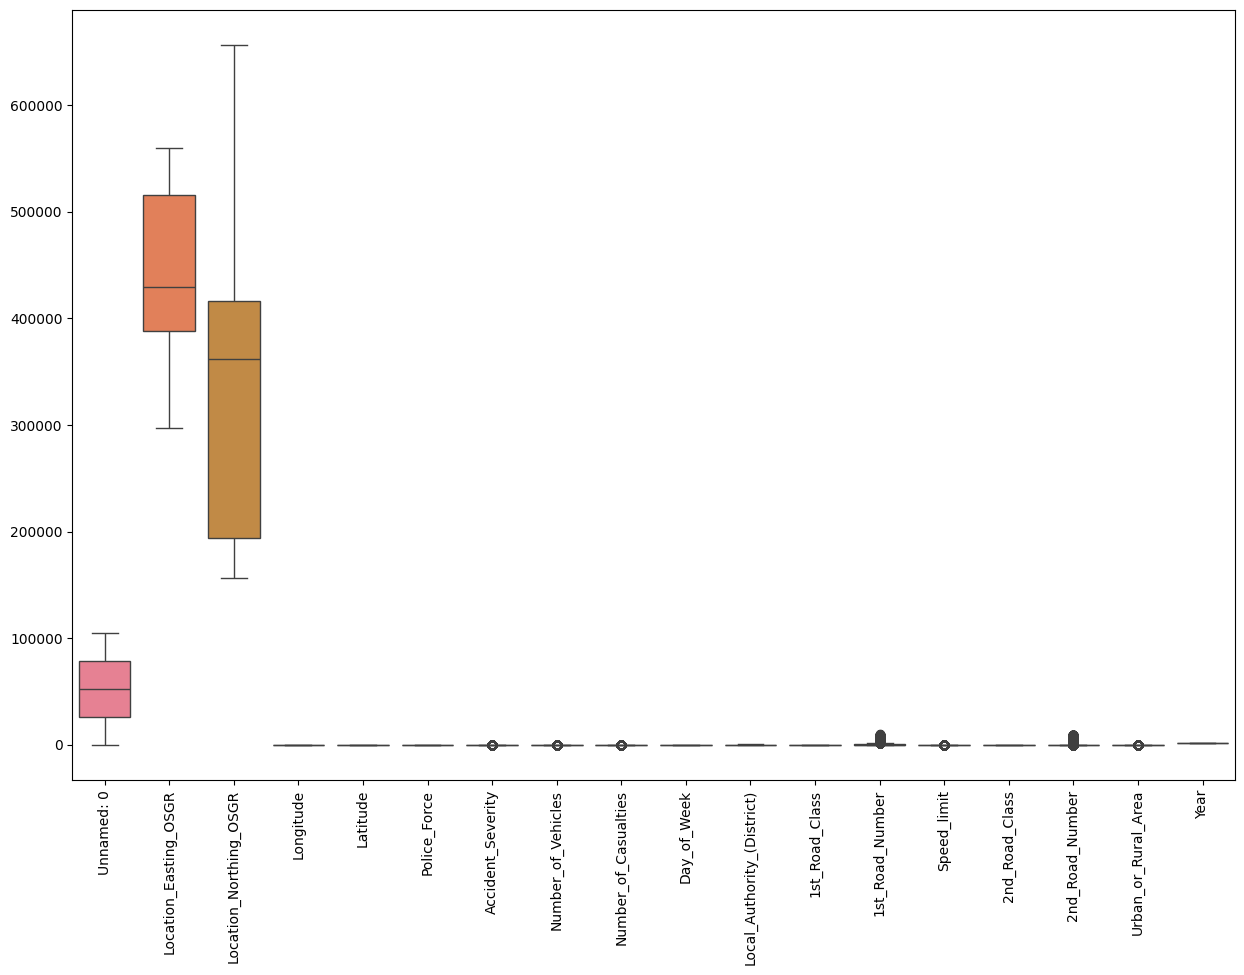

In [140]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()



*   I will buld a cluster  releted to the accedent and the condetion of the accedent befor and after



## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [141]:
df['Speed_limit'].fillna(value=df['Speed_limit'].mean)
df['Day_of_Week'].fillna(value=df['Day_of_Week'].mode)
df['Number_of_Vehicles'].fillna(value=df['Number_of_Vehicles'].mean)

,Number_of_Vehicles
0,2.0
1,1.0
2,2.0
3,2.0
4,1.0
...,...
51995,2.0
51996,1.0
51997,1.0
51998,2.0


In [142]:
df=df.fillna(value=df.mode)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [183]:
catecorical_columns = df[['Light_Conditions','Weather_Conditions']]
numarical_columns = df[['Longitude','Latitude','Number_of_Casualties']]



In [187]:
catecorical_columns.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Light_Conditions    52000 non-null  object
 1   Weather_Conditions  52000 non-null  object
dtypes: object(2)
memory usage: 812.6+ KB


In [170]:
catecorical_columns.dropna()

,Light_Conditions,Weather_Conditions
0,Daylight: Street light present,Fine without high winds
1,Daylight: Street light present,Fine without high winds
2,Daylight: Street light present,Fine without high winds
3,Darkness: Street lights present and lit,Fine without high winds
4,Darkness: Street lights present and lit,Fine without high winds
...,...,...
51995,Daylight: Street light present,Fine without high winds
51996,Daylight: Street light present,Fine without high winds
51997,Daylight: Street light present,Raining without high winds
51998,Darkeness: No street lighting,Fine without high winds


In [146]:
scaled_numarical_columns.shape


(52000, 3)

In [152]:
scaled_numarical_columns


array([[-0.86421208, -0.33998617,  0.79758893],
       [-0.38607263, -0.45997161, -0.44595342],
       [ 1.12631997, -1.39519405,  0.79758893],
       ...,
       [ 1.27865607, -1.39585063, -0.44595342],
       [-0.17031133,  1.07920561,  0.79758893],
       [ 1.11910233,  0.76528863, -0.44595342]])

In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scaler=StandardScaler()
scaler.fit(numarical_columns)
scaled_numarical_columns=scaler.transform(numarical_columns)
label_encoder = LabelEncoder()
df_scaled=numarical_columns+catecorical_columns


In [185]:
df_scaled.isna().sum()

,0
Latitude,52000
Light_Conditions,52000
Longitude,52000
Number_of_Casualties,52000
Weather_Conditions,52000


In [188]:
from sklearn.decomposition import PCA
n=2
pca = PCA(n_components=n)
df_pca = pca.fit_transform(scaled_numarical_columns)

In [189]:
df_pca

array([[ 0.53856953,  0.6891284 ],
       [-0.15078492, -0.42709233],
       [-1.56042062,  1.1737216 ],
       ...,
       [-1.9430444 , -0.01365381],
       [ 1.03957613,  0.58483811],
       [-0.34236765, -0.36998141]])

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

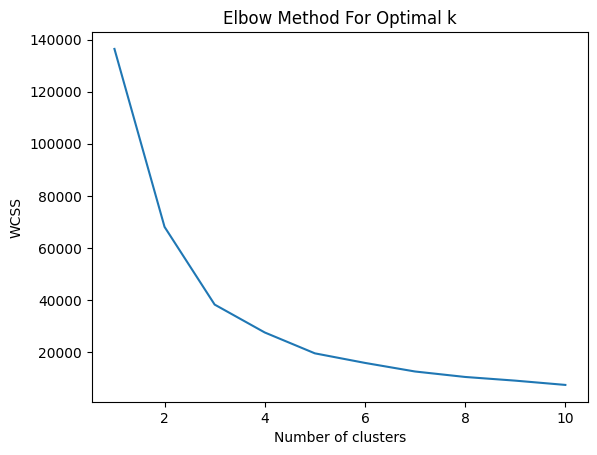

In [195]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [196]:
optimal_k =3

kmeans = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_pca)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

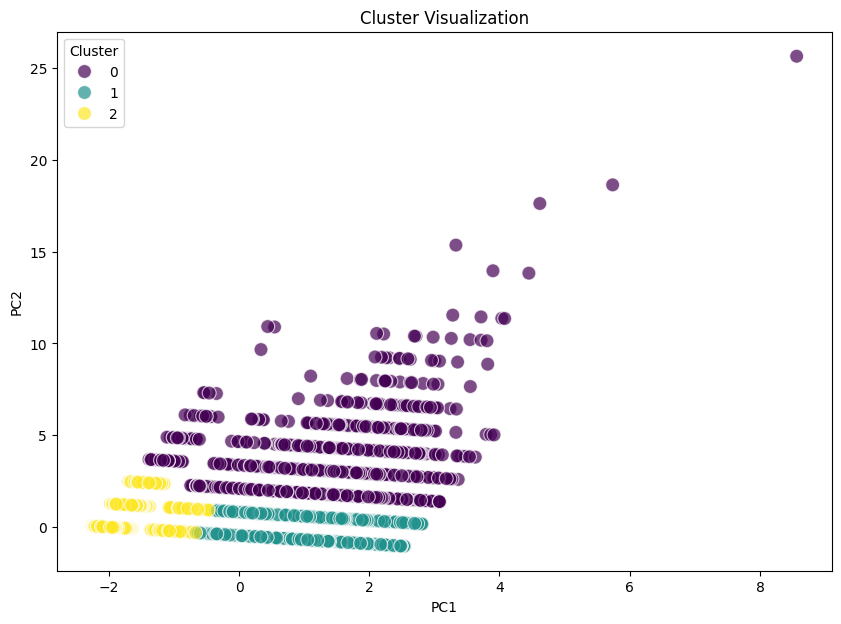

In [197]:
import seaborn as sns
df_plot = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = clusters

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_plot, palette='viridis', s=100, alpha=0.7)
plt.title('Cluster Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()


## Evaluation
Evaluate the clustering result using appropriate metrics.


## Plot the data points with their predicted cluster center

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?


*   <h2>--my plan was that i see pattern in accident and the condition of the
accident befor and after with k-mean clustring


* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   *   <h2> --with the elbow Method  
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
 *   <h2> -- we can evaluate the clusters with within-cluster sum-of-squares matrices
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?